<a href="https://colab.research.google.com/github/Rishabhs-07/Portfolio/blob/main/Hate_Speech_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
!pip install tensorflow
!pip install nltk tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd

hate_df = pd.read_csv('labeled_data.csv.zip')
hate_df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
hate_df = hate_df[['tweet', 'class']]

In [ ]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [ ]:
hate_df.columns

Index(['tweet', 'class'], dtype='object')

In [ ]:
hate_df.rename(columns = {'tweet': 'text', 'class': 'label'}, inplace = True)

In [ ]:
hate_df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
hate_df.isnull().sum()

,0
text,0
label,0


In [ ]:
hate_df.shape

(24783, 2)

In [ ]:
hate_df['label'].value_counts()

,count
label,
1,19190
2,4163
0,1430


In [ ]:
one_df = hate_df[hate_df['label'] == 1].sample(n = 2570, random_state = 42)
ontwo_df = hate_df[hate_df['label'] == 2].sample(n = 2000, random_state = 42)
hate_df = hate_df[hate_df['label'] != 1]
hate_df = hate_df[hate_df['label'] != 2]

In [ ]:
one_df.shape

(2570, 2)

In [ ]:
ontwo_df.shape

(2000, 2)

In [ ]:
hate_df.shape

(1430, 2)

In [ ]:
hate_df = pd.concat([one_df,hate_df], axis = 0)
hate_df = pd.concat([ontwo_df,hate_df], axis = 0)

In [ ]:
hate_df.shape

(6000, 2)

In [ ]:
hate_df.shape

(6000, 2)

In [ ]:
hate_df.head(3)

,text,label
18754,RT @chicagotribune: Chicago will not refund $7...,2
21093,"Sometimes, even I gotta tell these hoes to gro...",2
1069,&#8216;Chillin&#8217; With My Homie Or What&#8...,2


In [ ]:
hate_df.reset_index(drop = True, inplace = True)

In [ ]:
hate_df.head(3)

,text,label
0,RT @chicagotribune: Chicago will not refund $7...,2
1,"Sometimes, even I gotta tell these hoes to gro...",2
2,&#8216;Chillin&#8217; With My Homie Or What&#8...,2


In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
len(stop_words)

198

In [ ]:
def stopword_removal(text):
    all_words = nltk.word_tokenize(text)
    filtered_words = [word for word in all_words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
hate_df['text'] = hate_df['text'].apply(stopword_removal)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(hate_df['text'])


In [ ]:
hate_seq = tokenizer.texts_to_sequences(hate_df['text'])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming hate_seq is already created like this:
# hate_seq = tokenizer.texts_to_sequences(hate_df['text'])

max_length = 50
hate_padded = pad_sequences(hate_seq, maxlen=max_length, padding='post')


In [ ]:
import numpy as np

hate_label = np.array(hate_df['label'])


In [ ]:
hate_input = hate_padded

In [ ]:
from tensorflow import keras

hate_input_layer = keras.layers.Input(shape=(max_length,), name='hate_input')


In [ ]:
embedding_layer = keras.layers.Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = 128)

In [ ]:
hate_embedding = embedding_layer(hate_input_layer)

In [ ]:
shared_lstm = keras.layers.LSTM(64, return_sequences = True)

In [ ]:
hate_lstm = shared_lstm(hate_embedding)

In [ ]:
shared_pooling = keras.layers.GlobalAveragePooling1D()
shared_dropout = keras.layers.Dropout(0.5)

In [ ]:
hate_features = shared_dropout(shared_pooling(hate_lstm))

In [ ]:
len(hate_df['label'].unique())

3

In [ ]:
hate_output = keras.layers.Dense(6, activation = 'softmax', name = 'hate_output')(hate_features)

In [ ]:
from tensorflow import keras

# Assuming you already have hate_input_layer and hate_output defined

model = keras.models.Model(
    inputs=hate_input_layer,
    outputs=hate_output
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hate_input (InputLayer)         │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 50, 128)        │     1,959,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hate_output (Dense)             │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,838 (7.66 MB)

 Trainable params: 2,008,838 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(
    x=hate_input,
    y=hate_label,
    epochs=3,
    batch_size=4
)


Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.4963 - loss: 1.0376
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 37ms/step - accuracy: 0.8518 - loss: 0.4345
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9395 - loss: 0.1945


In [ ]:
prediction = model.predict(hate_input)


188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


In [ ]:
prediction

array([[1.21411518e-03, 7.69102422e-04, 9.97982800e-01, 1.36560029e-05,
        1.07155911e-05, 9.63778530e-06],
       [2.43104890e-01, 7.52334297e-01, 4.52725170e-03, 1.04256351e-05,
        1.25776842e-05, 1.06053385e-05],
       [3.38294776e-03, 1.61890162e-03, 9.94834840e-01, 6.52069066e-05,
        5.04589188e-05, 4.76385540e-05],
       ...,
       [9.15869713e-01, 8.19479600e-02, 2.15912843e-03, 7.61419869e-06,
        7.59267687e-06, 7.83418727e-06],
       [9.68595922e-01, 2.47734319e-02, 6.62842765e-03, 6.81642405e-07,
        8.28097541e-07, 8.39850088e-07],
       [9.72163320e-01, 2.45487336e-02, 3.19219707e-03, 3.36481098e-05,
        3.02242806e-05, 3.18990424e-05]], dtype=float32)

In [ ]:
hate_pred = np.argmax(prediction, axis=1)


In [ ]:
def plot_cm(true, pred, title, labels):
    cf = confusion_matrix(true, pred, normalize = 'true')
    plt.figure(figsize = (7,6))
    sns.heatmap(cf, annot = True, cmap = 'Blues', xticklabels = labels, yticklabels = labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    hate_labels_text = ['Neutral', 'Offensive', 'Hate Speech']

In [ ]:
hate_labels_text = ['Neutral', 'Offensive', 'Hate Speech']


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


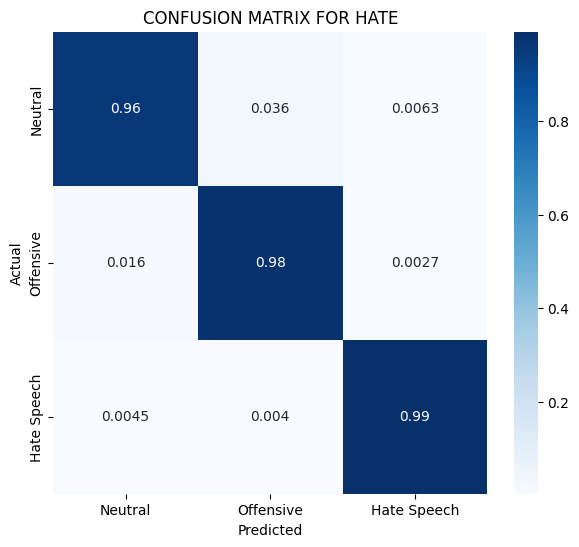

In [ ]:
plot_cm(hate_label, hate_pred, 'CONFUSION MATRIX FOR HATE', hate_labels_text)


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def classify_text(input_text):
    input_text_cleaned = remove_stopwords(input_text)
    input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(input_sequence, maxlen=max_length, padding='post')

    prediction = model.predict(input_padded)[0]  # [Neutral, Offensive, Hate Speech]
    predicted_index = np.argmax(prediction)
    predicted_prob = prediction[predicted_index]

    # DEBUG PRINT (optional)
    print(f"Probabilities: Neutral={prediction[0]:.2f}, Offensive={prediction[1]:.2f}, Hate Speech={prediction[2]:.2f}")
    print(f"Predicted Index: {predicted_index}, Confidence: {predicted_prob:.2f}")

    # Threshold sanity check (adjustable)
    thresholds = [0.4, 0.65, 0.7]  # Neutral, Offensive, Hate Speech

    if predicted_prob < thresholds[predicted_index]:
        sub_label = 'Neutral'  # fallback if not confident enough
    else:
        sub_label = ['Neutral', 'Offensive', 'Hate Speech'][predicted_index]

    major_label = 'Hate'  # Can rename to 'Text Category' if you want
    return major_label, sub_label


In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
input_text_widget = widgets.Text(
    description = 'Input text :',
    placeholder = 'Enter your text'
)

In [ ]:
button = widgets.Button(description = 'Detect')

In [ ]:
output = widgets.Output()

In [ ]:
def on_button_click(b):
    with output:
        output.clear_output() #CLEAR THE PREV OUTPUT
        input_text = input_text_widget.value
        major_label, sub_label = classify_text(input_text)
        print(f'Major Label: {major_label}')
        print(f'Sub Label: {sub_label}')

#ATTACH BUTTON
button.on_click(on_button_click)

In [ ]:
display(input_text_widget, button, output)

Text(value='', description='Input text :', placeholder='Enter your text')

Button(description='Detect', style=ButtonStyle())

Output()